
# 1. Install and Import Dependencies

In [4]:
!pip3 install torch==1.8.2+cpu torchvision==0.9.2+cpu torchaudio===0.8.2 -f https://download.pytorch.org/whl/lts/1.8/torch_lts.html

Looking in links: https://download.pytorch.org/whl/lts/1.8/torch_lts.html


In [5]:
!git clone https://github.com/ultralytics/yolov5

fatal: destination path 'yolov5' already exists and is not an empty directory.


In [6]:
!cd yolov5 & pip install -r requirements.txt

In [7]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2


# 2. Load Model

In [8]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

Downloading: "https://github.com/ultralytics/yolov5/archive/master.zip" to C:\Users\DELL/.cache\torch\hub\master.zip
YOLOv5  2022-6-28 Python-3.8.8 torch-1.8.2+cpu CPU



  0%|          | 0.00/14.1M [00:00<?, ?B/s]


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.5 GFLOPs
Adding AutoShape... 


In [9]:
model

AutoShape(
  (model): DetectMultiBackend(
    (model): Model(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
           

# 3. Make Detections with Images

In [10]:
img = 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQAqy_G8feo3-aIFuLlzMHtHZCq50e2znePFw&usqp=CAU.jpg'

In [11]:
results = model(img)
results.print()

image 1/1: 174x290 5 cars, 5 buss, 1 train
Speed: 478.2ms pre-process, 253.8ms inference, 41.1ms NMS per image at shape (1, 3, 384, 640)


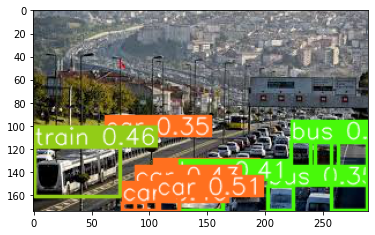

In [12]:
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()

results.render()

# 4. Real Time Detections

In [18]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    
    # Make detections 
    results = model(frame)
    
    cv2.imshow('YOLO', np.squeeze(results.render())) 
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

# 5. Train from scratch

In [2]:
import uuid   # Unique identifier
import os
import time


In [20]:

IMAGES_PATH = os.path.join('data', 'images') #/data/images
labels = ['tinh', 'buon_ngu']
number_imgs = 20

In [21]:
cap = cv2.VideoCapture(0)
# Loop through labels
for label in labels:
    print('Collecting images for {}'.format(label))
    time.sleep(5)
    
    # Loop through image range
    for img_num in range(number_imgs):
        print('Collecting images for {}, image number {}'.format(label, img_num))
        
        # Webcam feed
        ret, frame = cap.read()
        
        # Naming out image path
        imgname = os.path.join(IMAGES_PATH, label+'.'+str(uuid.uuid1())+'.jpg')
        
        # Writes out image to file 
        cv2.imwrite(imgname, frame)
        
        # Render to the screen
        cv2.imshow('Image Collection', frame)
        
        # 2 second delay between captures
        time.sleep(2)
        
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
cap.release()
cv2.destroyAllWindows()

In [22]:

print(os.path.join(IMAGES_PATH, labels[0]+'.'+str(uuid.uuid1())+'.jpg'))

data\images\tinh.4e28ac8e-2a68-11ec-861d-107d1a457807.jpg


In [23]:
for label in labels:
    print('Collecting images for {}'.format(label))
    for img_num in range(number_imgs):
        print('Collecting images for {}, image number {}'.format(label, img_num))
        imgname = os.path.join(IMAGES_PATH, label+'.'+str(uuid.uuid1())+'.jpg')
        print(imgname)

data\images\tinh.57af3c0e-2a68-11ec-98e1-107d1a457807.jpg
data\images\tinh.57af3c0f-2a68-11ec-a774-107d1a457807.jpg
data\images\tinh.57af3c10-2a68-11ec-a0a5-107d1a457807.jpg
data\images\tinh.57af3c11-2a68-11ec-9f73-107d1a457807.jpg
data\images\tinh.57af3c12-2a68-11ec-8df2-107d1a457807.jpg
data\images\tinh.57af3c13-2a68-11ec-a6e0-107d1a457807.jpg
data\images\tinh.57af3c14-2a68-11ec-b379-107d1a457807.jpg
data\images\tinh.57af3c15-2a68-11ec-ab50-107d1a457807.jpg
data\images\tinh.57af3c16-2a68-11ec-ab11-107d1a457807.jpg
data\images\tinh.57af3c17-2a68-11ec-8e89-107d1a457807.jpg
data\images\tinh.57af3c18-2a68-11ec-a993-107d1a457807.jpg
data\images\tinh.57af3c19-2a68-11ec-b203-107d1a457807.jpg
data\images\tinh.57af630a-2a68-11ec-82c1-107d1a457807.jpg
data\images\tinh.57af630b-2a68-11ec-a994-107d1a457807.jpg
data\images\tinh.57af630c-2a68-11ec-9fd9-107d1a457807.jpg
data\images\tinh.57af630d-2a68-11ec-80a8-107d1a457807.jpg
data\images\tinh.57af630e-2a68-11ec-80bd-107d1a457807.jpg
data\images\ti

In [24]:
!git clone https://github.com/tzutalin/labelImg

Cloning into 'labelImg'...


In [ ]:
!pip install pyqt5 lxml --upgrade
!cd labelImg && pyrcc5 -o libs/resources.py resources.qrc

In [19]:
!cd yolov5 && python train.py --img 320 --batch 16 --epochs 500 --data dataset.yaml --weights yolov5s.pt --workers 2

train: weights=yolov5s.pt, cfg=, data=dataset.yaml, hyp=data\hyps\hyp.scratch.yaml, epochs=500, batch_size=16, imgsz=320, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, adam=False, sync_bn=False, workers=2, project=runs\train, name=exp, exist_ok=False, quad=False, linear_lr=False, label_smoothing=0.0, patience=100, freeze=0, save_period=-1, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github:  YOLOv5 is out of date by 6 commits. Use `git pull` or `git clone https://github.com/ultralytics/yolov5` to update.
Weights & Biases: run 'pip install wandb' to automatically track and visualize YOLOv5  runs (RECOMMENDED)
Plotting labels... 


YOLOv5  v5.0-506-g7d37b3c torch 1.8.2+cpu CPU

hyperparameters: lr0=0.01, lrf=0.2, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, degrees=0.0, translate=0.1, scale=0.5, shear=0.0, perspective=0.0, flipud=0.0, fliplr=0.5, mosaic=1.0, mixup=0.0, copy_paste=0.0
TensorBoard: Start with 'tensorboard --logdir runs\train', view at http://localhost:6006/
Overriding model.yaml nc=80 with nc=2

                 from  n    params  module                                  arguments                     
  0                -1  1      3520  models.common.Focus                     [3, 32, 3]                    
  1                -1  1     18560  models.common.Conv                      [32, 64, 3, 2]                
  2                -1  1     18816  models.common.C3                        [64, 64, 1]                   
  3     

# 6. Load Custom Model

In [13]:
model = torch.hub.load('ultralytics/yolov5', 'custom', path='yolov5/runs/train/exp2/weights/last.pt', force_reload=True)

Downloading: "https://github.com/ultralytics/yolov5/archive/master.zip" to C:\Users\DELL/.cache\torch\hub\master.zip
YOLOv5  2021-10-12 torch 1.8.2+cpu CPU

Fusing layers... 
Model Summary: 224 layers, 7056607 parameters, 0 gradients
Adding AutoShape... 


In [14]:
img = os.path.join('data', 'images', 'tinh.f8826ed9-2a67-11ec-a82c-107d1a457807.jpg')

In [15]:
results = model(img)

In [16]:
results.print()

image 1/1: 480x640 1 tinh
Speed: 10.9ms pre-process, 311.2ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)


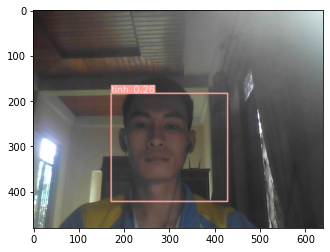

In [17]:
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()

In [18]:

cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    
    # Make detections 
    results = model(frame)
    
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()